In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [2]:
crime=pd.read_csv('crime_data.csv',index_col='United_State')

In [3]:
crime.head()

,Murder,Assault,UrbanPop,Rape
United_State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
crime.shape

(50, 4)

In [6]:
crime.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<Axes: ylabel='United_State'>

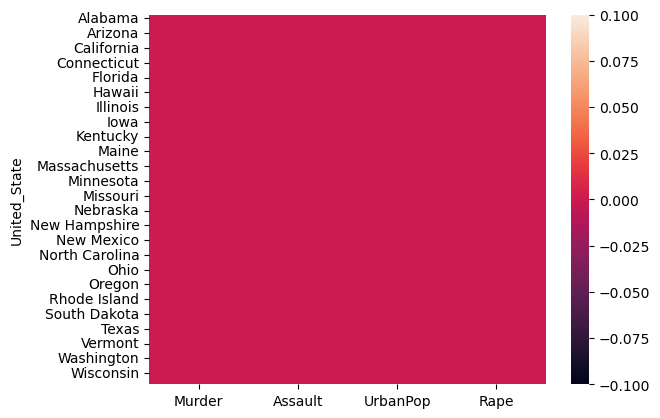

In [7]:
sns.heatmap(data=crime.isnull())

In [8]:
crime.duplicated().sum()

0

In [9]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


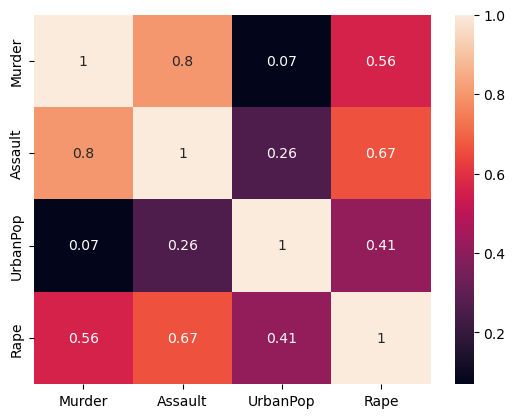

In [11]:
sns.heatmap(crime.corr(),annot=True)
plt.show()

# visualise the data

<Axes: >

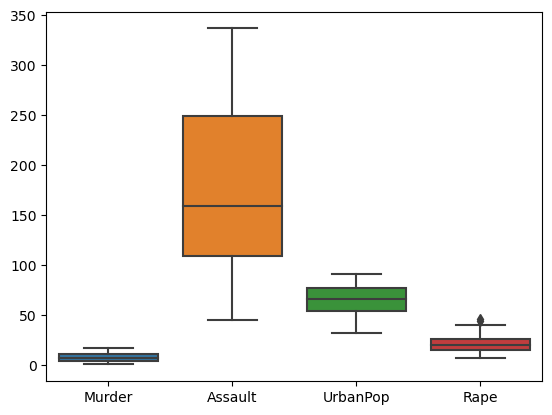

In [12]:
sns.boxplot(data=crime)

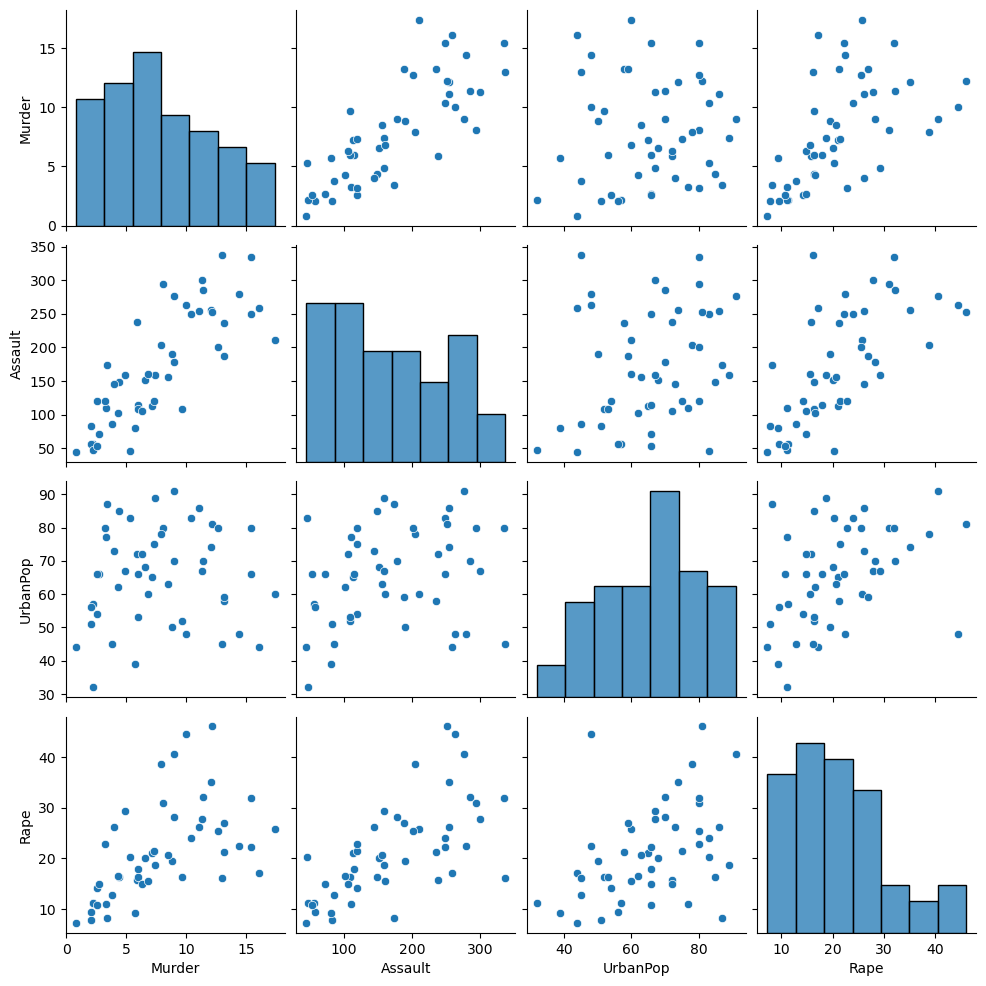

In [13]:
sns.pairplot(data=crime)

# cluster Types

# KMEANS Clustering

scale the data

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sd_scaler= StandardScaler()

In [16]:
scaled_data=sd_scaler.fit_transform(crime)
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.


Build the model

In [17]:
from sklearn.cluster import KMeans

In [18]:
kmodel=KMeans(n_clusters=3,random_state=42)

In [19]:
kmodel.fit(scaled_data)

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KMeans(n_clusters=3, random_state=42)

In [20]:
kmodel.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [21]:
crime['Label']=kmodel.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,Label
United_State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


# Hyperparameter Tuning

In [22]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(crime)
    wcss.append(model.inertia_)
wcss  

[355837.74159999995,
 96428.89021346469,
 47988.90285714286,
 34748.266857142866,
 24518.988190476193,
 18891.26977777778,
 15478.396,
 13344.25245238095,
 12337.431666666664,
 10484.42119047619]

# plot

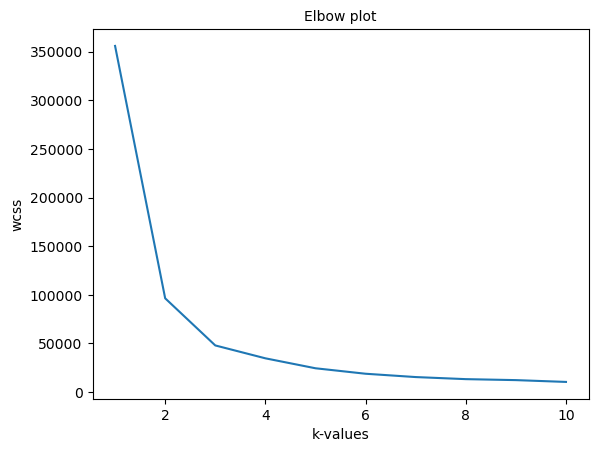

In [23]:
plt.plot(range(1,11),wcss)
plt.title('Elbow plot',fontsize=10)
plt.xlabel('k-values')
plt.ylabel('wcss')
plt.show()

# Build the final model with k=3 

In [24]:
fin_model=KMeans(n_clusters=3,random_state=42)

In [25]:
fin_model.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [26]:
fin_model.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [27]:
crime['Label']=fin_model.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,Label
United_State,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [28]:
grp=crime.groupby('Label')

In [29]:
for x,y in grp:
    print(y)
    print(50*'__')

               Murder  Assault  UrbanPop  Rape  Label
United_State                                         
Connecticut       3.3      110        77  11.1      0
Delaware          5.9      238        72  15.8      0
Hawaii            5.3       46        83  20.2      0
Indiana           7.2      113        65  21.0      0
Kansas            6.0      115        66  18.0      0
Massachusetts     4.4      149        85  16.3      0
New Jersey        7.4      159        89  18.8      0
Ohio              7.3      120        75  21.4      0
Oklahoma          6.6      151        68  20.0      0
Oregon            4.9      159        67  29.3      0
Pennsylvania      6.3      106        72  14.9      0
Rhode Island      3.4      174        87   8.3      0
Utah              3.2      120        80  22.9      0
Virginia          8.5      156        63  20.7      0
Washington        4.0      145        73  26.2      0
Wyoming           6.8      161        60  15.6      0
____________________________

In [30]:
grp.agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Label,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


# Hierachical Agglomerative Clustering

scale the data

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mn_scalar=MinMaxScaler()

In [33]:
scaled_mn=mn_scalar.fit_transform(crime)

In [34]:
scaled_mn[5]

array([0.42771084, 0.54452055, 0.77966102, 0.81136951, 0.5       ])

Build the model

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
hac_model=AgglomerativeClustering(affinity='euclidean',linkage='complete')

In [37]:
hac_model.fit(scaled_mn)

AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [38]:
hac_model.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0], dtype=int64)

In [39]:
crime['HAC_Labels']=hac_model.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,Label,HAC_Labels
United_State,,,,,,
Alabama,13.2,236,58,21.2,1,0
Alaska,10.0,263,48,44.5,1,0
Arizona,8.1,294,80,31.0,1,0
Arkansas,8.8,190,50,19.5,2,1
California,9.0,276,91,40.6,1,0


In [40]:
crime.drop('Label', axis =1, inplace=True)

In [41]:
hac_grp= crime.groupby('HAC_Labels')

In [42]:
for x,y in hac_grp:
    print(y)
    print(50*'__')

                Murder  Assault  UrbanPop  Rape  HAC_Labels
United_State                                               
Alabama           13.2      236        58  21.2           0
Alaska            10.0      263        48  44.5           0
Arizona            8.1      294        80  31.0           0
California         9.0      276        91  40.6           0
Colorado           7.9      204        78  38.7           0
Connecticut        3.3      110        77  11.1           0
Delaware           5.9      238        72  15.8           0
Florida           15.4      335        80  31.9           0
Georgia           17.4      211        60  25.8           0
Hawaii             5.3       46        83  20.2           0
Illinois          10.4      249        83  24.0           0
Indiana            7.2      113        65  21.0           0
Kansas             6.0      115        66  18.0           0
Louisiana         15.4      249        66  22.2           0
Maryland          11.3      300        6

In [43]:
hac_grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
HAC_Labels,,,,
0,9.272222,203.527778,70.833333,24.55
1,3.971429,86.500000,51.928571,12.70


# plot the diagram


In [44]:
from scipy.cluster import hierarchy

In [45]:
hr=hierarchy.linkage(scaled_mn,method='complete')

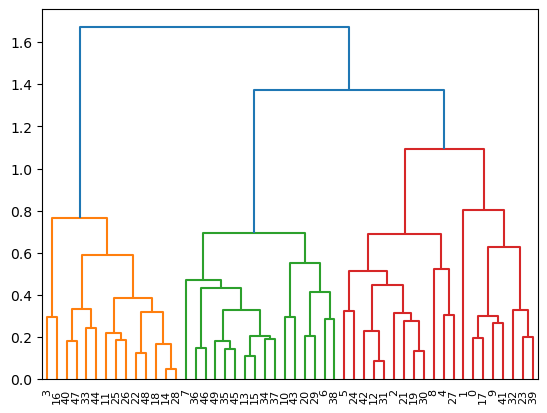

In [46]:
dn=hierarchy.dendrogram(hr)

# DBscam clustering

build the model

In [47]:
from sklearn.cluster import DBSCAN 

In [48]:
model=DBSCAN(eps=0.5,min_samples=12)

In [49]:
model.fit(crime)

DBSCAN(min_samples=12)

In [50]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [51]:
crime['labels']=model.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,HAC_Labels,labels
United_State,,,,,,
Alabama,13.2,236,58,21.2,0,-1
Alaska,10.0,263,48,44.5,0,-1
Arizona,8.1,294,80,31.0,0,-1
Arkansas,8.8,190,50,19.5,1,-1
California,9.0,276,91,40.6,0,-1


In [52]:
BD_grp=crime.groupby('labels')

In [53]:
for x,y in BD_grp:
    print(y)
    print(50*'__')

                Murder  Assault  UrbanPop  Rape  HAC_Labels  labels
United_State                                                       
Alabama           13.2      236        58  21.2           0      -1
Alaska            10.0      263        48  44.5           0      -1
Arizona            8.1      294        80  31.0           0      -1
Arkansas           8.8      190        50  19.5           1      -1
California         9.0      276        91  40.6           0      -1
Colorado           7.9      204        78  38.7           0      -1
Connecticut        3.3      110        77  11.1           0      -1
Delaware           5.9      238        72  15.8           0      -1
Florida           15.4      335        80  31.9           0      -1
Georgia           17.4      211        60  25.8           0      -1
Hawaii             5.3       46        83  20.2           0      -1
Idaho              2.6      120        54  14.2           1      -1
Illinois          10.4      249        83  24.0 

In [54]:
grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
Label,,,,
0,5.656250,138.875,73.875000,18.78125
1,12.165000,255.250,68.400000,29.16500
2,3.971429,86.500,51.928571,12.70000


split the data

In [55]:
x=crime.iloc[:,0:4]

In [56]:
x.head()

,Murder,Assault,UrbanPop,Rape
United_State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# visualise the data (KMEANS)

In [57]:
from sklearn.manifold import TSNE

In [58]:
y=crime.iloc[:,3]
y.head()

United_State
Alabama       21.2
Alaska        44.5
Arizona       31.0
Arkansas      19.5
California    40.6
Name: Rape, dtype: float64

In [59]:
model=TSNE(n_components=2)

In [60]:
tsne_comps=model.fit_transform(x)
tsne_comps[5]

array([-11.17721  ,  -1.5432445], dtype=float32)

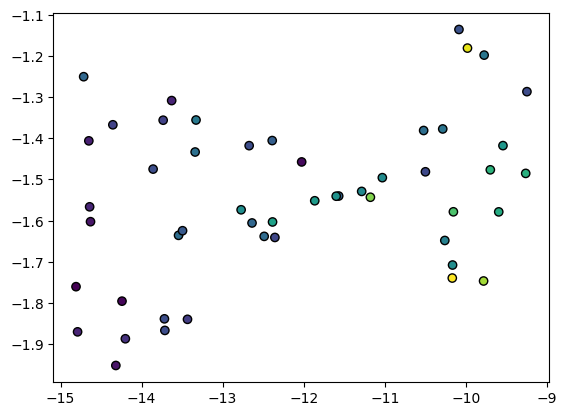

In [61]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y,cmap='viridis',edgecolors='black')
plt.show()

# visualise the data (Hierachical Agglomerative)

In [62]:
y1=crime.iloc[:,4]
y1.head()

United_State
Alabama       0
Alaska        0
Arizona       0
Arkansas      1
California    0
Name: HAC_Labels, dtype: int64

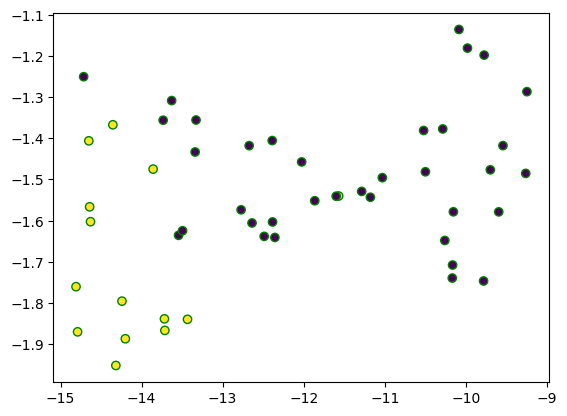

In [63]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y1,cmap='viridis',edgecolors='green')
plt.show()

# visualise the data (DBSCAMS)

In [64]:
y2=crime.iloc[:,5]
y2.head()

United_State
Alabama      -1
Alaska       -1
Arizona      -1
Arkansas     -1
California   -1
Name: labels, dtype: int64

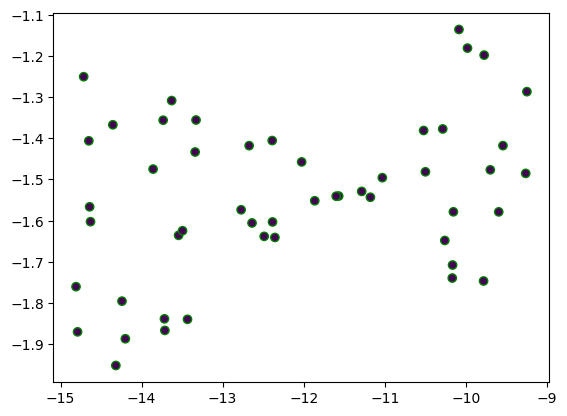

In [65]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y2,cmap='viridis',edgecolors='green')
plt.show()

# ------------------------------------------------------------------------------------------------------------

.

# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.  

In [66]:
airlines=pd.read_csv('EastWestAirlines.csv')

In [67]:
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [68]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [69]:
airlines.shape

(3999, 12)

In [70]:
airlines.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<Axes: >

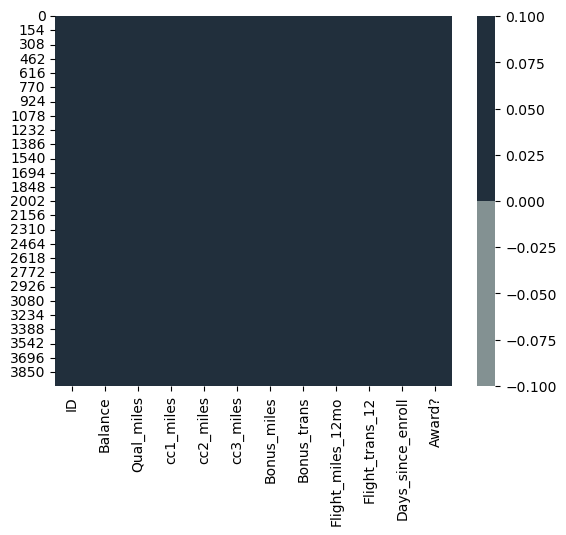

In [71]:
color=['#839192','#212F3C']
pal=sns.color_palette(color)
sns.heatmap(airlines.isnull(),cmap=pal)

In [72]:
airlines.duplicated().sum()

0

In [73]:
airlines.corr().sum()

ID                  -1.057917
Balance              2.873064
Qual_miles           1.540671
cc1_miles            3.193295
cc2_miles            1.022012
cc3_miles            1.400017
Bonus_miles          3.812743
Bonus_trans          3.907315
Flight_miles_12mo    3.044433
Flight_trans_12      3.210096
Days_since_enroll    1.207639
Award?               2.821266
dtype: float64

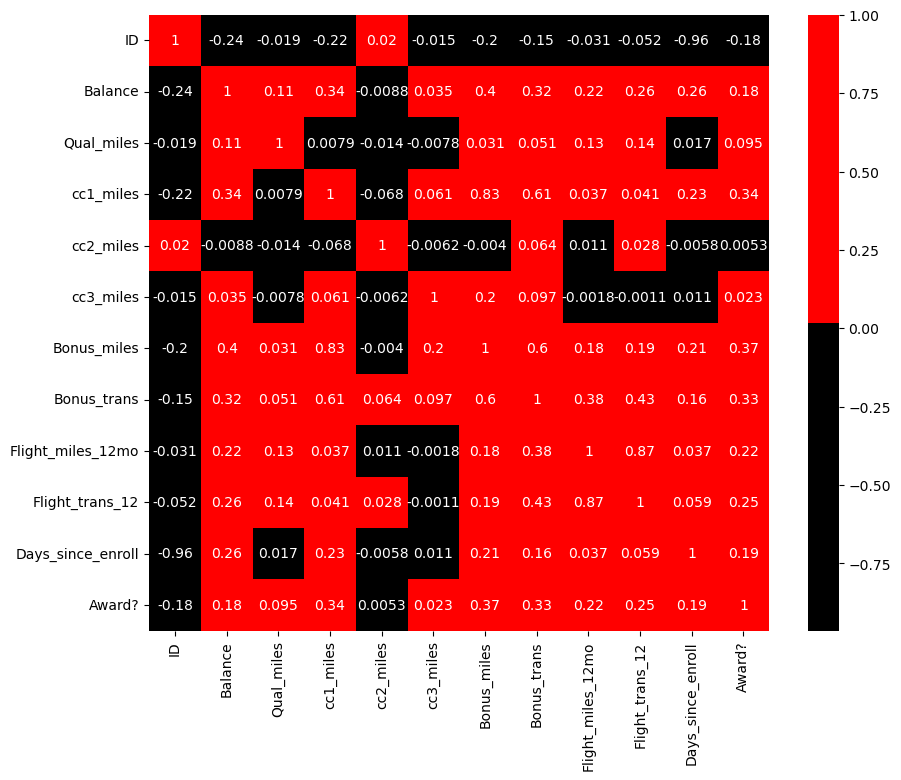

In [74]:
plt.figure(figsize=(10,8))
color=['black','red']
pal=sns.color_palette(color)
sns.heatmap(airlines.corr(),cmap=pal,annot=True)
plt.show()

visualise the data

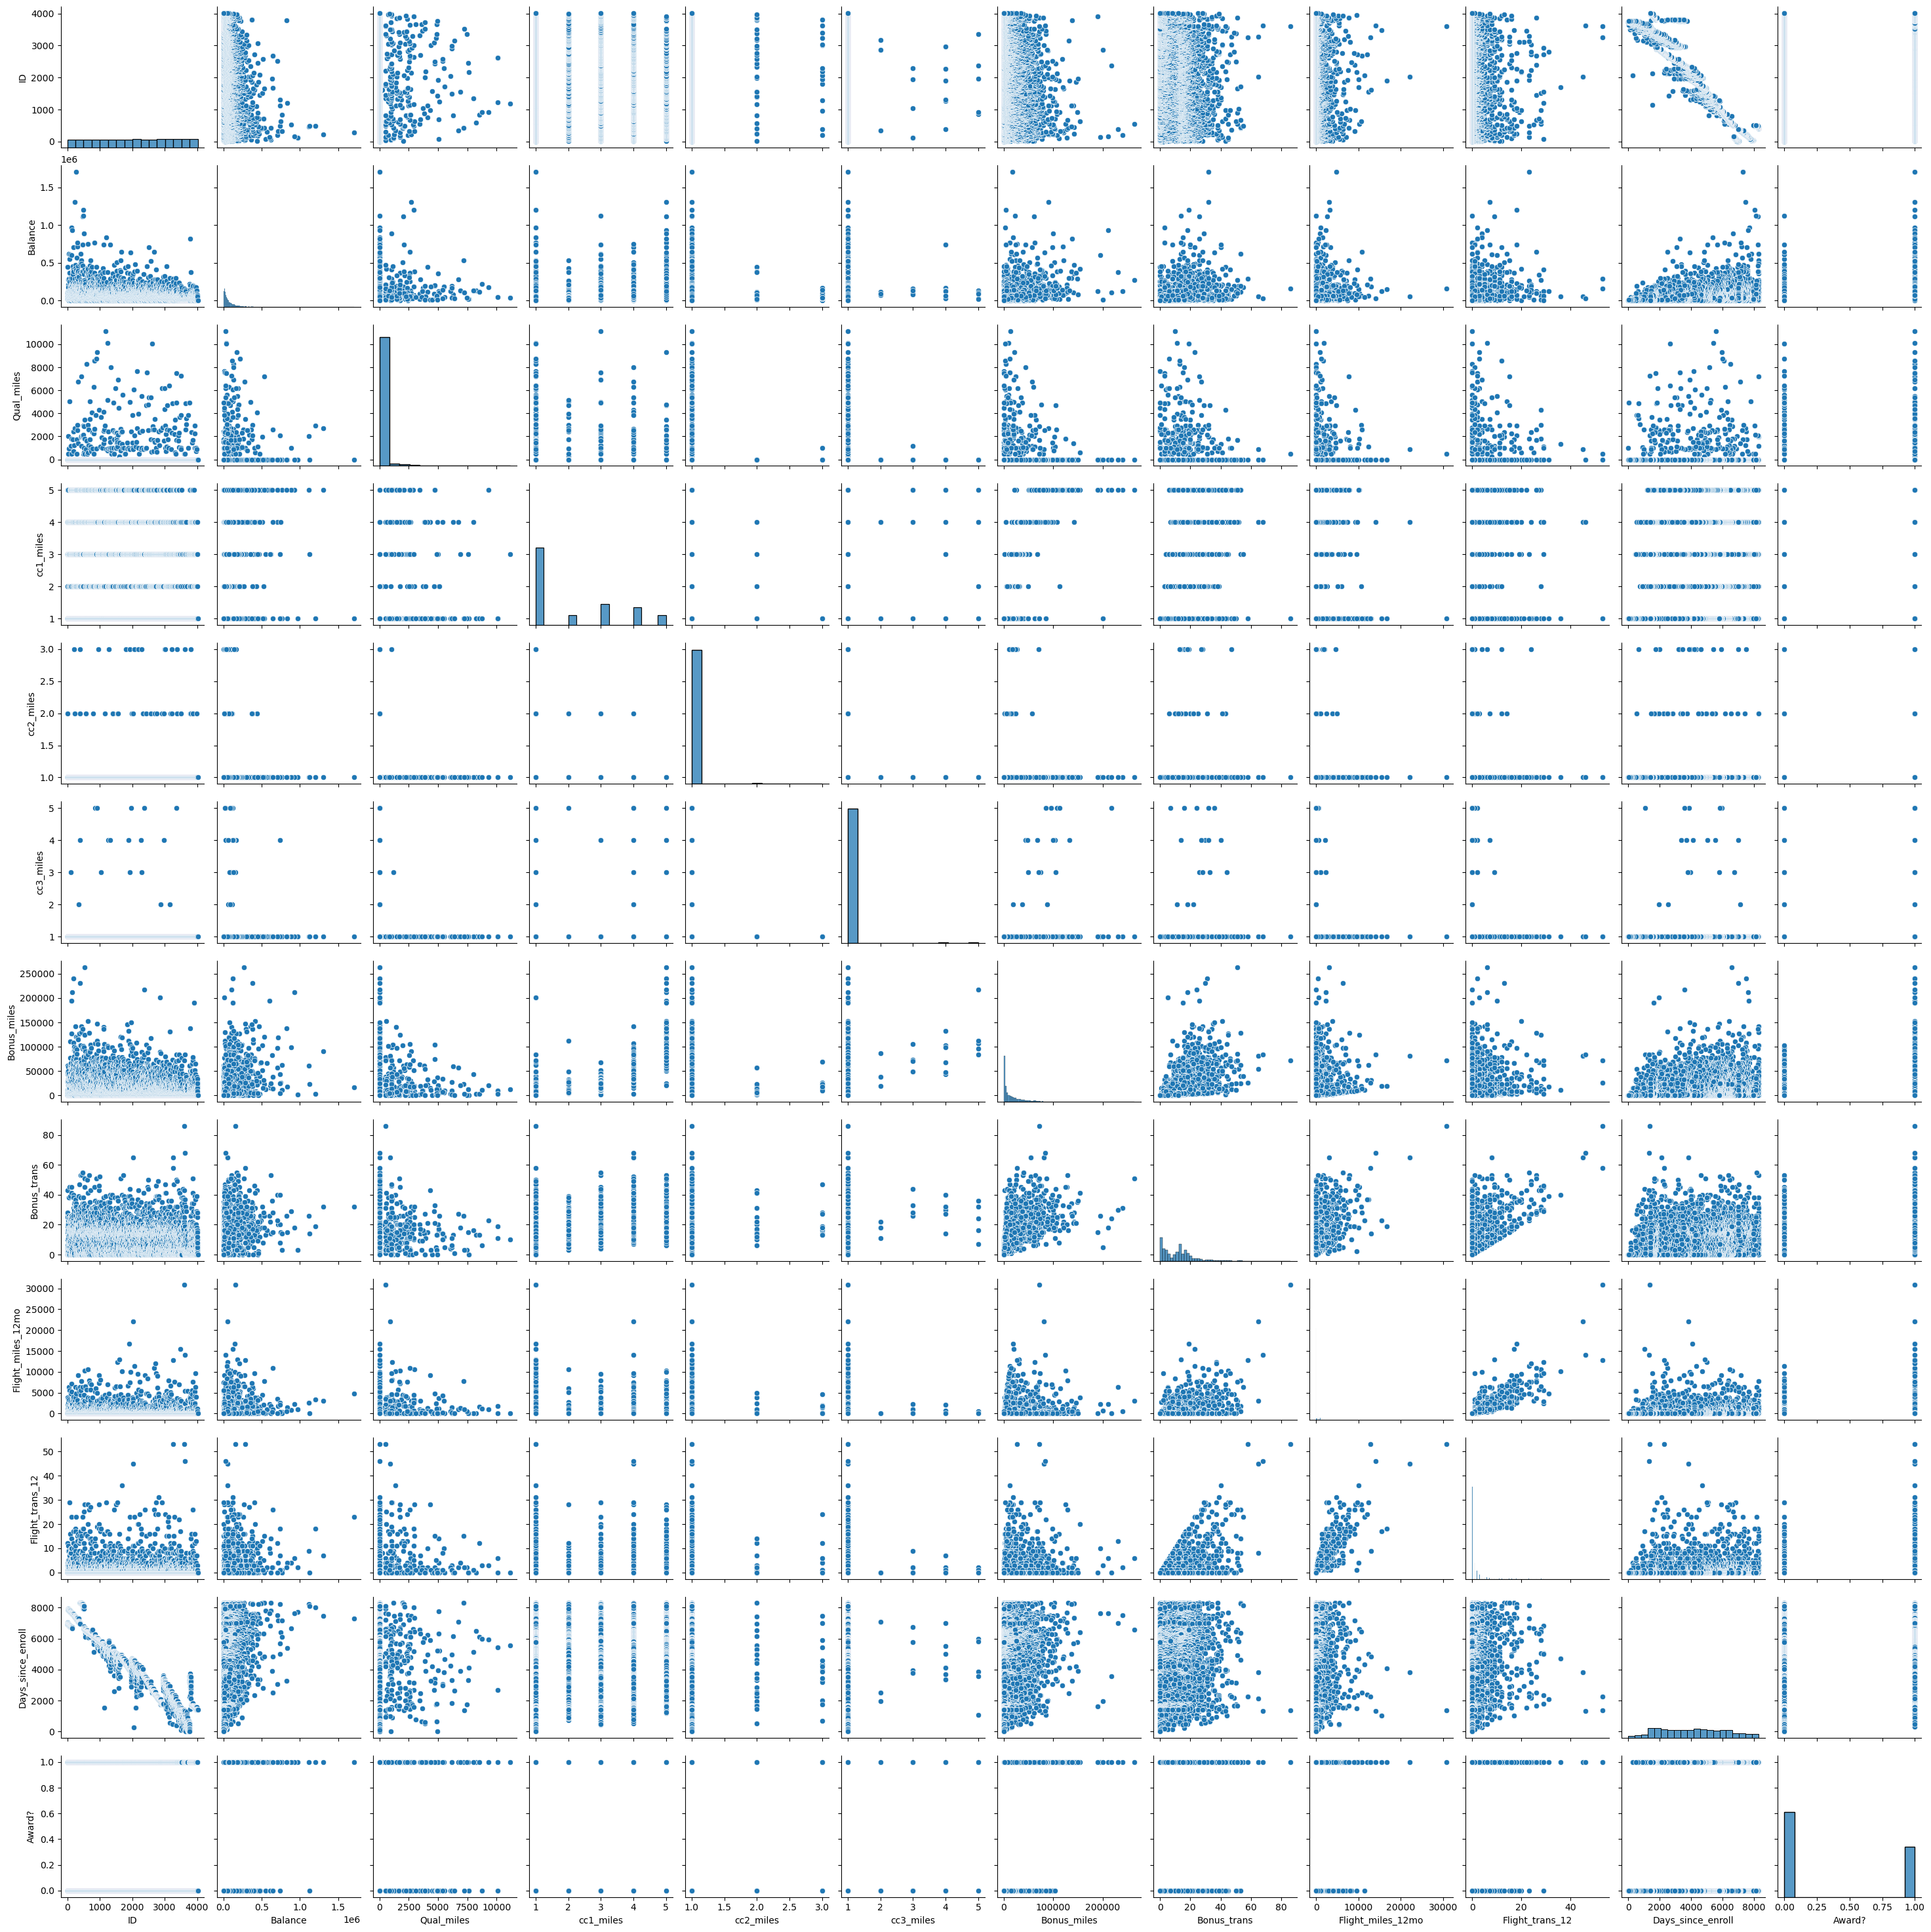

In [75]:
sns.pairplot(airlines)

<Axes: >

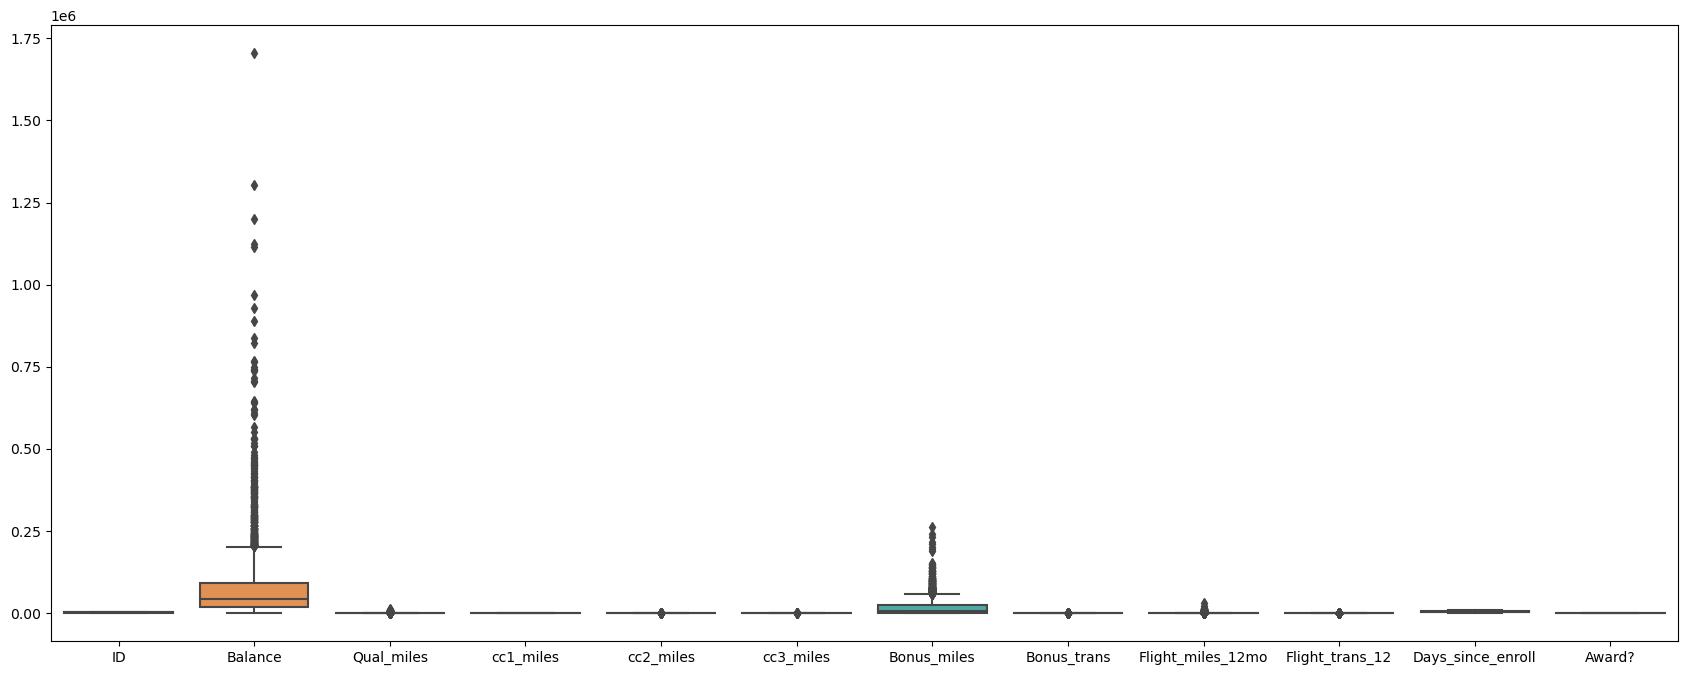

In [76]:
plt.figure(figsize=(21,8))
sns.boxplot(airlines)

# cluster Types

# KMEANS Clustering

scale the data

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sd_scaler= StandardScaler()

In [79]:
scaled_data=sd_scaler.fit_transform(airlines)
scaled_data

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

Build the model

In [80]:
from sklearn.cluster import KMeans

In [81]:
kmodel=KMeans(n_clusters=3,random_state=42)

In [82]:
kmodel.fit(scaled_data)
kmodel.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [83]:
airlines['Label']=kmodel.labels_
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


# Hyperparameter Tuning

In [84]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(airlines)
    wcss.append(model.inertia_)
wcss

[42967206848564.164,
 20828852095394.375,
 11797435959417.797,
 7554668287151.564,
 5729432724781.717,
 4546507929783.353,
 3702347058268.6567,
 3277003113196.402,
 2905263005563.1406,
 2638311522162.5537]

plot

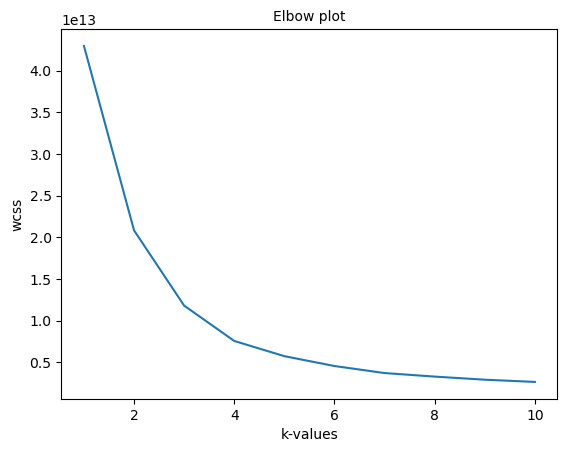

In [85]:
plt.plot(range(1,11),wcss)
plt.title('Elbow plot',fontsize=10)
plt.xlabel('k-values')
plt.ylabel('wcss')
plt.show()

# Build the final model with k=3

In [86]:
fin_model=KMeans(n_clusters=3,random_state=42)

In [87]:
fin_model.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [88]:
fin_model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [89]:
airlines['Label']=fin_model.labels_
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [90]:
grp=airlines.groupby('Label')

In [91]:
for x,y in grp:
    print(y)
    print(50*'__')

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
42      43    60313           0          1          1          1        10000   
50      51   108137           0          1          1          1         6368   
...    ...      ...         ...        ...        ...        ...          ...   
3907  3930   126490           0          1          1          1         8808   
3911  3934    55922        2273          1          1          1         8104   
3917  3940   130748           0          4          1          1        65510   
3934  3957    76595           0          1          1          1        10577   
3950  3973    59650           0          1          1          1         5050   

      Bonus_trans  Flight_m

In [92]:
grp.agg(['mean'])

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Label,,,,,,,,,,,,
0,1753.128049,189304.225610,788.689024,2.182927,1.036585,1.000000,31780.481707,27.115854,5420.414634,15.841463,4657.036585,0.810976
1,2324.241897,42286.342688,92.323715,1.246245,1.019368,1.000000,4903.299209,7.000395,195.184585,0.601976,3554.698419,0.204743
2,1447.829885,119771.163985,163.517241,3.620690,1.002299,1.037548,39038.232950,18.573180,350.190038,1.051341,5144.044444,0.636015


# Hierachical Agglomerative Clustering

scale the data

In [93]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
mn_scalar=MinMaxScaler()

In [95]:
scaled_mn=mn_scalar.fit_transform(airlines)

In [96]:
scaled_mn[5]

array([0.00124378, 0.00963141, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.83674946, 0.        , 0.5       ])

# Build the model

In [97]:
from sklearn.cluster import AgglomerativeClustering

In [98]:
hac_model=AgglomerativeClustering(affinity='euclidean',linkage='complete')

In [99]:
hac_model.fit(scaled_mn)

AgglomerativeClustering(affinity='euclidean', linkage='complete')

In [100]:
hac_model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
airlines['HAC_Labels']=hac_model.labels_
airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Label,HAC_Labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2,0


In [102]:
airlines.drop('Label', axis =1, inplace=True)

In [103]:
hac_grp= airlines.groupby('HAC_Labels')

In [104]:
for x,y in hac_grp:
    print(y)
    print(50*'__')

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [105]:
hac_grp.agg('mean')

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
HAC_Labels,,,,,,,,,,,,
0,2013.704881,73542.85632,143.911389,2.059074,1.014518,1.012265,17096.29612,11.54418,440.531414,1.325657,4120.4801,0.369712
1,3128.000000,131999.50000,347.000000,2.500000,1.000000,1.000000,65634.25000,69.25000,19960.000000,49.250000,2200.2500,1.000000


# plot the diagram

In [106]:
hr=hierarchy.linkage(scaled_mn,method='complete')

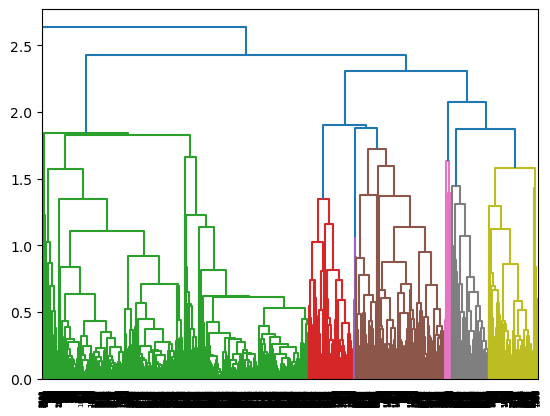

In [107]:
dn=hierarchy.dendrogram(hr)

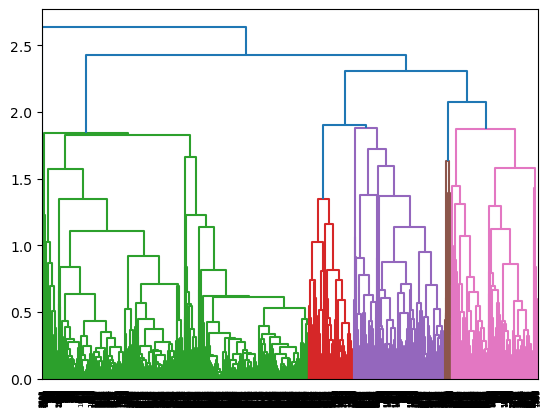

In [108]:
dn=hierarchy.dendrogram(hr,color_threshold=1.9)

# DBscam clustering

build the model

In [109]:
from sklearn.cluster import DBSCAN

In [110]:
model=DBSCAN(eps=0.5,min_samples=14)

In [111]:
model.fit(scaled_mn)

DBSCAN(min_samples=14)

In [112]:
model.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [113]:
airlines['dbscan_labels']=model.labels_

airlines


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HAC_Labels,dbscan_labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [114]:
BD_grp=airlines.groupby('dbscan_labels')

In [115]:
for x,y in BD_grp:
    print(y)
    print(50*'__')

        ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
50      51   108137           0          1          1          1         6368   
106    109    96627        1182          1          1          3        49059   
112    115   124198           0          5          1          1        66330   
198    202     8669           0          1          3          1        11397   
220    224  1302051        2706          5          1          1        90653   
226    230   117329           0          1          2          1         6448   
243    247   118934           0          5          1          1        66222   
275    279  1704838           0          1          1          1        17108   
371    376   107707           0          3          1          1        19407   
381    386   167670           0          1          3          1        15907   
384    389    28193         

In [116]:
grp.agg('mean')

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Label,,,,,,,,,,,,
0,1753.128049,189304.225610,788.689024,2.182927,1.036585,1.000000,31780.481707,27.115854,5420.414634,15.841463,4657.036585,0.810976
1,2324.241897,42286.342688,92.323715,1.246245,1.019368,1.000000,4903.299209,7.000395,195.184585,0.601976,3554.698419,0.204743
2,1447.829885,119771.163985,163.517241,3.620690,1.002299,1.037548,39038.232950,18.573180,350.190038,1.051341,5144.044444,0.636015


In [117]:
#split the data

X=airlines.iloc[:,0:12]

X.head()


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# visualise the data (KMEANS)

In [118]:
y=airlines.iloc[:,11]
y.head()


0    0
1    0
2    0
3    0
4    1
Name: Award?, dtype: int64

In [119]:
model=TSNE(n_components=2)

In [120]:
tsne_comps=model.fit_transform(X)
tsne_comps

array([[-40.713013 , -25.57828  ],
       [-53.252853 , -10.732781 ],
       [ -3.0151775, -40.534946 ],
       ...,
       [ 25.988878 ,  -9.076168 ],
       [ 14.197075 , -38.99676  ],
       [-40.519073 ,  41.51848  ]], dtype=float32)

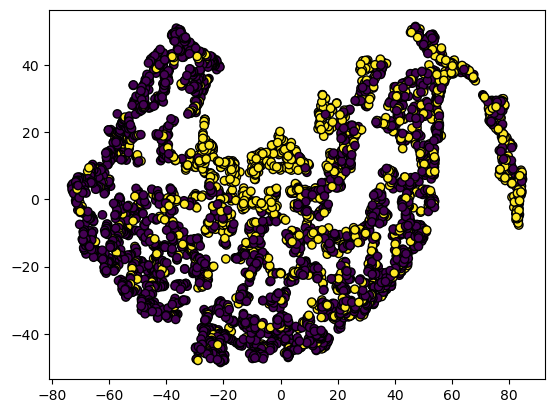

In [121]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y,cmap='viridis',edgecolors='black')
plt.show()

# visualise the data(Hierachical Agglomerative)

In [122]:
y1=airlines.iloc[:,12]
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: HAC_Labels, dtype: int64

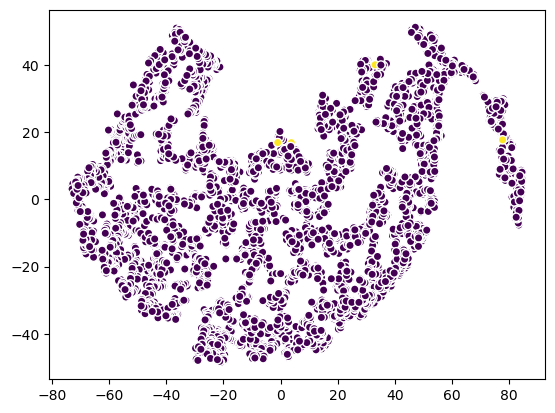

In [123]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y1,cmap='viridis',edgecolors='white')
plt.show()

# visualise the data(DBSCAN)

In [124]:
y2=airlines.iloc[:,13]
y2.head()

0    0
1    0
2    0
3    0
4    1
Name: dbscan_labels, dtype: int64

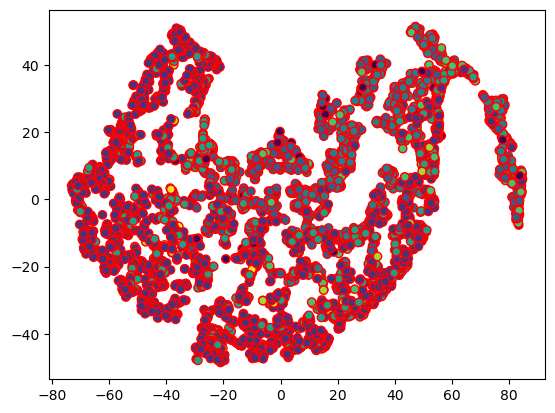

In [125]:
plt.scatter(tsne_comps[:,0],tsne_comps[:,1] ,c=y2,cmap='viridis',edgecolors='red')
plt.show()